Playground for Red Kangaroo (Osphranter Rufus)

In [276]:
import galah
from matplotlib import pyplot as plt
import geopandas as gpd
import pandas as pd
import shapely
from shapely.ops import unary_union, linemerge, split
from shapely.geometry import Point

In [203]:
galah.galah_config(atlas="Australia", email="callumwaite2000@gmail.com", data_profile="ALA")

In [204]:
galah.atlas_counts(taxa="Osphranter Rufus")

,totalRecords
0,64419


In [205]:
galah.atlas_counts(taxa="Osphranter Rufus", use_data_profile=True)

,totalRecords
0,62481


In [206]:
galah.atlas_counts(taxa="Osphranter Rufus", use_data_profile=True, group_by="basisOfRecord", expand=False)

,basisOfRecord,count
0,HUMAN_OBSERVATION,59325
1,MACHINE_OBSERVATION,127
2,MATERIAL_CITATION,2
3,MATERIAL_SAMPLE,96
4,OBSERVATION,319
5,OCCURRENCE,252
6,PRESERVED_SPECIMEN,2360


In [207]:
galah.atlas_counts(taxa="Osphranter Rufus", use_data_profile=True, filters="basisOfRecord=HUMAN_OBSERVATION")

,totalRecords
0,59325


In [208]:
galah.search_all(fields="data", column_name="id")

,id,description,type,link
0,inDataset,NaN,field,NaN
1,datasetID,http://rs.tdwg.org/dwc/terms/datasetID,field,NaN
2,dataHubUid,The Atlas thematic groups for this record.,field,NaN
3,datasetName,The name of the dataset for this record. Typic...,field,NaN
4,dataHubName,NaN,field,NaN
5,dataProviderUid,The Atlas ID for the data resource,field,NaN
6,dataResourceUid,A list (concatenated and separated) of prepara...,field,NaN
7,raw_datasetTitle,NaN,field,NaN
8,text_datasetName,NaN,field,NaN
9,dataProviderName,The data provider for this record,field,NaN


In [209]:
galah.atlas_counts(taxa="Osphranter Rufus", use_data_profile=True, filters="basisOfRecord=HUMAN_OBSERVATION", group_by="dataResourceName", expand=False)

,dataResourceName,count
0,SA Fauna,45085
1,NSW BioNet Atlas,8196
2,Fauna Atlas N.T.,4805
3,WildNet - Queensland Wildlife Data,642
4,iNaturalist Australia,517
5,Earth Guardians Weekly Feed,38
6,ALA species sightings and OzAtlas,24
7,Northern Gulf Fauna Survey,9
8,NatureShare,5
9,NatureMapr,4


In [210]:
galah.atlas_counts(taxa="Osphranter Rufus", use_data_profile=True, filters="basisOfRecord=HUMAN_OBSERVATION", group_by="dataProviderName", expand=False)

,dataProviderName,count
0,"South Australia, Department for Environment an...",45085
1,"Department of Planning, Industry and Environme...",8196
2,Northern Territory Department of Environment a...,4805
3,Questagame,38
4,Citizen Science - ALA Website,24
5,NatureMapr,4


Plot Red Kangaroos in terms of where they are in Australia

In [211]:
states_territories = gpd.read_file("Shapefiles/STE_2021_AUST_GDA2020/STE_2021_AUST_GDA2020.shp")
states_territories_main = states_territories[states_territories["STE_NAME21"] != "Other Territories"]

In [212]:
states_territories_main = states_territories_main.to_crs(4326)

<Axes: >

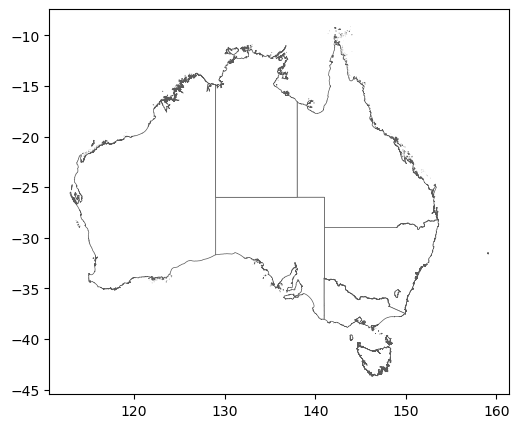

In [213]:
states_territories_main.plot(edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))

Add occurrences

In [214]:
red_kangaroo_all = galah.atlas_occurrences(taxa="Osphranter Rufus", use_data_profile=True, filters="basisOfRecord=HUMAN_OBSERVATION")

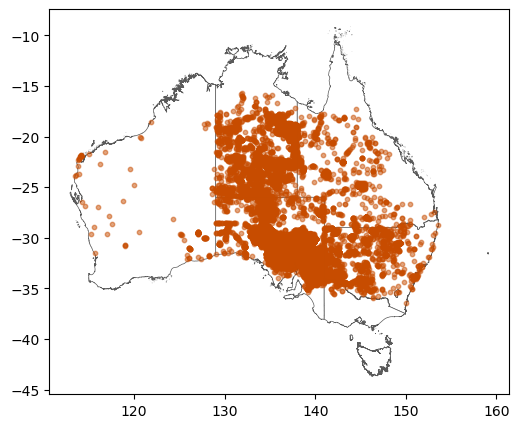

In [215]:
states_territories_main.plot(edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
plt.scatter(red_kangaroo_all["decimalLongitude"], red_kangaroo_all["decimalLatitude"], c = "#C74C00", alpha = 0.5, s=10)
plt.savefig("Red_Kangaroo_Occurrences_All.png", dpi=300)

In [216]:
galah.atlas_counts(taxa="Osphranter Rufus", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970"])

,totalRecords
0,59291


In [217]:
red_kangaroo_1970_now = galah.atlas_occurrences(taxa="Osphranter Rufus", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970"])

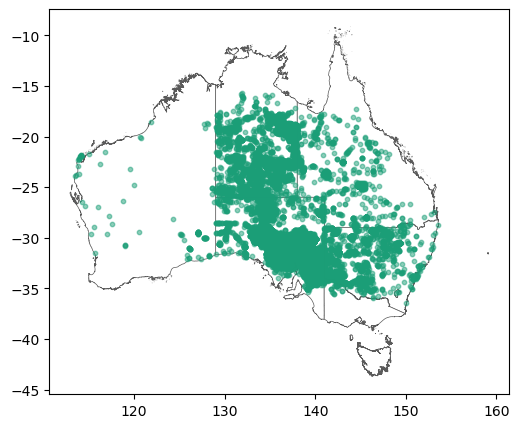

In [218]:
states_territories_main.plot(edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
plt.scatter(red_kangaroo_1970_now["decimalLongitude"],red_kangaroo_1970_now["decimalLatitude"], c="#1B9E77", alpha=0.5, s=10)

In [219]:
galah.atlas_counts(taxa="Osphranter Rufus", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970"], group_by=["year"], expand=False)

,year,count
0,1970,6
1,1971,4
2,1972,3
3,1973,6
4,1974,2
5,1975,15
6,1976,20
7,1977,13
8,1978,666
9,1979,761


<BarContainer object of 55 artists>

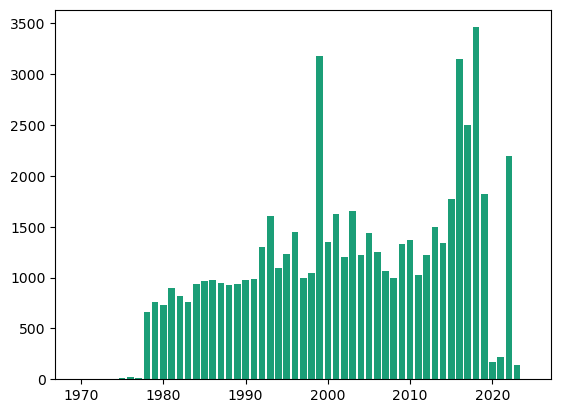

In [220]:
counts_by_year_red_kangaroo = galah.atlas_counts(taxa="Osphranter Rufus", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970"], group_by=["year"], expand=False)
plt.bar(counts_by_year_red_kangaroo["year"],counts_by_year_red_kangaroo["count"], color="#1b9e77")

First check from all records, then by mammals

In [221]:
counts_by_year_all = galah.atlas_counts(use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970"], group_by=["year"], expand=False)

In [222]:
count_proportion_red_kangaroo = counts_by_year_red_kangaroo["count"] / counts_by_year_all["count"]
counts_by_year_red_kangaroo["proportion of total counts"] = count_proportion_red_kangaroo
counts_by_year_red_kangaroo.head()

,year,count,proportion of total counts
0,1970,6,0.000035
1,1971,4,0.000052
2,1972,3,0.000044
3,1973,6,0.000080
4,1974,2,0.000029


Text(0.5, 0.98, 'Red Kangaroo (Osphranter Rufus) All Records')

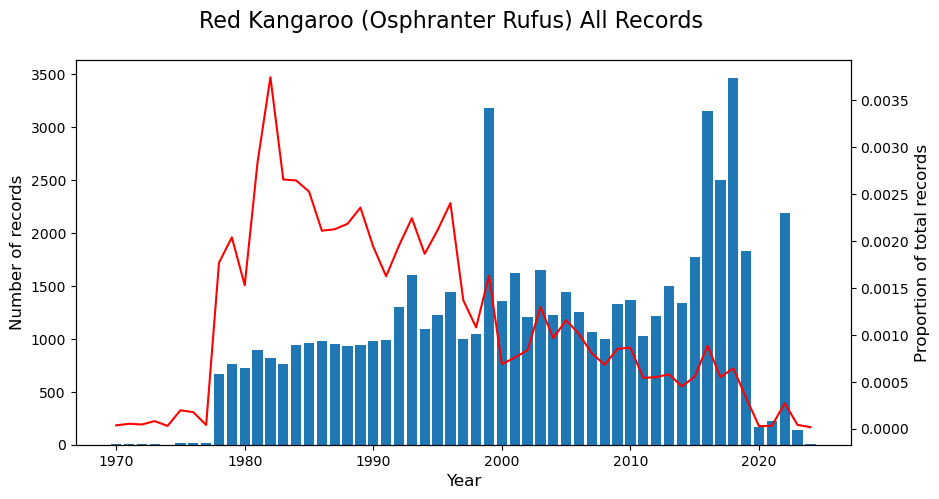

In [223]:
counts_by_year_red_kangaroo = galah.atlas_counts(taxa="Osphranter Rufus", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970"], group_by=["year"], expand=False)
counts_by_year_red_kangaroo["proportion of total counts"] = count_proportion_red_kangaroo
fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
ax.bar(counts_by_year_red_kangaroo["year"], counts_by_year_red_kangaroo["count"])
ax2.plot(counts_by_year_red_kangaroo["year"], counts_by_year_red_kangaroo["proportion of total counts"], color="red")
ax.set_xlabel("Year", size=12)
ax.set_ylabel("Number of records", size=12)
ax2.set_ylabel("Proportion of total records", size=12)
fig.suptitle("Red Kangaroo (Osphranter Rufus) All Records", size=16)

Now select by mammalia

In [224]:
counts_by_year_mammalia = galah.atlas_counts(taxa="mammalia", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970"], group_by=["year"], expand=False)

In [225]:
counts_by_year_mammalia.head()

,year,count
0,1970,1601
1,1971,1334
2,1972,2300
3,1973,2011
4,1974,2435


In [226]:
count_proportion_red_kangaroo_mammals = counts_by_year_red_kangaroo["count"] / counts_by_year_mammalia["count"]
counts_by_year_red_kangaroo["proportion of total counts mammals"] = count_proportion_red_kangaroo_mammals
counts_by_year_red_kangaroo.head()

,year,count,proportion of total counts,proportion of total counts mammals
0,1970,6,0.000035,0.003748
1,1971,4,0.000052,0.002999
2,1972,3,0.000044,0.001304
3,1973,6,0.000080,0.002984
4,1974,2,0.000029,0.000821


Text(0.5, 0.98, 'Red Kangaroo (Osphranter Rufus) Mammalian Records')

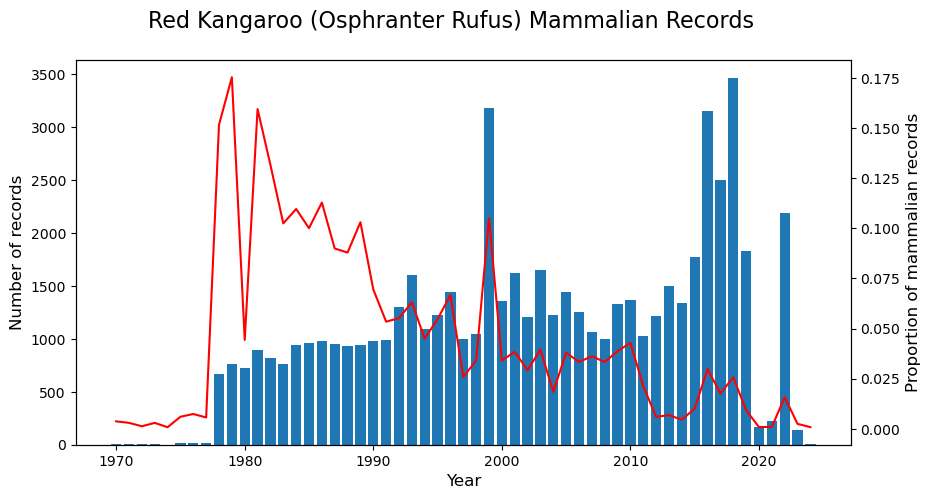

In [227]:
counts_by_year_red_kangaroo["proportion of total counts mammals"] = count_proportion_red_kangaroo_mammals
fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
ax.bar(counts_by_year_red_kangaroo["year"], counts_by_year_red_kangaroo["count"])
ax2.plot(counts_by_year_red_kangaroo["year"], counts_by_year_red_kangaroo["proportion of total counts mammals"], color="red")
ax.set_xlabel("Year", size=12)
ax.set_ylabel("Number of records", size=12)
ax2.set_ylabel("Proportion of mammalian records", size=12)
fig.suptitle("Red Kangaroo (Osphranter Rufus) Mammalian Records", size=16)

## Only in NT and SA

In [228]:
states_territories_main

,STE_CODE21,STE_NAME21,CHG_FLAG21,CHG_LBL21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry
0,1,New South Wales,0,No change,AUS,Australia,8.007977e+05,http://linked.data.gov.au/dataset/asgsed3/STE/1,"MULTIPOLYGON (((159.06230 -31.50886, 159.06218..."
1,2,Victoria,0,No change,AUS,Australia,2.274962e+05,http://linked.data.gov.au/dataset/asgsed3/STE/2,"MULTIPOLYGON (((146.29286 -39.15778, 146.29341..."
2,3,Queensland,0,No change,AUS,Australia,1.730171e+06,http://linked.data.gov.au/dataset/asgsed3/STE/3,"MULTIPOLYGON (((142.53140 -10.68301, 142.53072..."
3,4,South Australia,0,No change,AUS,Australia,9.842314e+05,http://linked.data.gov.au/dataset/asgsed3/STE/4,"MULTIPOLYGON (((140.66025 -38.06256, 140.66006..."
4,5,Western Australia,0,No change,AUS,Australia,2.526632e+06,http://linked.data.gov.au/dataset/asgsed3/STE/5,"MULTIPOLYGON (((117.86953 -35.19108, 117.86961..."
5,6,Tasmania,0,No change,AUS,Australia,6.801754e+04,http://linked.data.gov.au/dataset/asgsed3/STE/6,"MULTIPOLYGON (((144.60439 -41.01001, 144.60443..."
6,7,Northern Territory,0,No change,AUS,Australia,1.348134e+06,http://linked.data.gov.au/dataset/asgsed3/STE/7,"MULTIPOLYGON (((133.02818 -10.90839, 133.02982..."
7,8,Australian Capital Territory,0,No change,AUS,Australia,2.358133e+03,http://linked.data.gov.au/dataset/asgsed3/STE/8,"POLYGON ((149.06239 -35.15910, 149.09134 -35.1..."
9,Z,Outside Australia,1,New,ZZZ,Outside Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/STE/Z,None


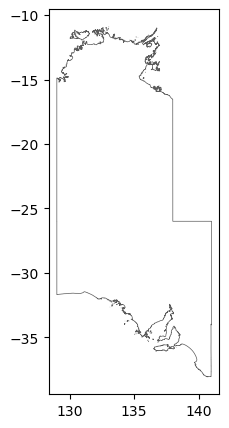

In [229]:
import shapely
from shapely.ops import unary_union
polygons = [states_territories[states_territories["STE_NAME21"] == "Northern Territory"]["geometry"][6], states_territories[states_territories["STE_NAME21"] == "South Australia"]["geometry"][3]]
boundary_NT_SA = gpd.GeoSeries(unary_union(polygons))
boundary_NT_SA.plot(edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
plt.show()

In [230]:
boundary_NT_SA

0    MULTIPOLYGON (((129.15975 -15.19249, 129.15811...
dtype: geometry

In [231]:
galah.atlas_counts(taxa="Osphranter Rufus", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION","year>=1970"])

,totalRecords
0,59291


In [232]:
galah.atlas_counts(taxa="Osphranter Rufus", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION","year>=1970"], polygon=boundary_NT_SA[0])

,totalRecords
0,50110


In [233]:
occurrences_red_kangaroo_NT_SA = galah.atlas_occurrences(taxa="Osphranter Rufus", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION","year>=1970"], polygon=boundary_NT_SA[0])
occurrences_red_kangaroo_NT_SA.shape

(50110, 8)

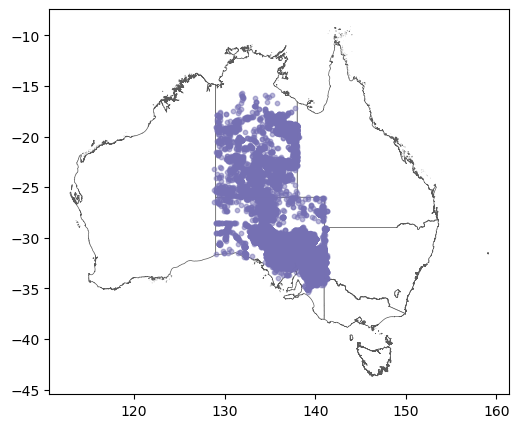

In [234]:
states_territories_main.plot(edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
plt.scatter(occurrences_red_kangaroo_NT_SA["decimalLongitude"], occurrences_red_kangaroo_NT_SA["decimalLatitude"], c="#7570b3", alpha=0.5, s=10)

In [235]:
counts_red_kangaroo_NT_SA_year = galah.atlas_counts(taxa="Osphranter Rufus", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970"], polygon=boundary_NT_SA[0], group_by="year", expand=False).rename(columns={"count": "Red Kangaroo"})

In [236]:
counts_red_kangaroo_NT_SA_year.head()

,year,Red Kangaroo
0,1971,2
1,1972,1
2,1973,1
3,1975,8
4,1976,3


In [237]:
counts_all_NT_SA_year = galah.atlas_counts(use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970"], polygon=boundary_NT_SA[0], group_by="year", expand=False).rename(columns={"count": "All Species"})
counts_mammalia_NT_SA_year = galah.atlas_counts(taxa="Mammalia", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970"], polygon=boundary_NT_SA[0], group_by="year", expand=False).rename(columns={"count": "Mammals"})

In [238]:
#counts_all_NT_SA_year.head(n=60)
#counts_mammalia_NT_SA_year.head(n=10)

In [239]:
#counts_red_kangaroo_NT_SA_year.head(n=60)

In [240]:
counts_NT_SA_year = counts_all_NT_SA_year.merge(counts_mammalia_NT_SA_year, on="year", how="left").merge(counts_red_kangaroo_NT_SA_year, on="year", how="left").fillna(0)
counts_NT_SA_year.head()

,year,All Species,Mammals,Red Kangaroo
0,1970,18785,246,0.0
1,1971,34180,204,2.0
2,1972,16727,325,1.0
3,1973,12850,150,1.0
4,1974,18573,117,0.0


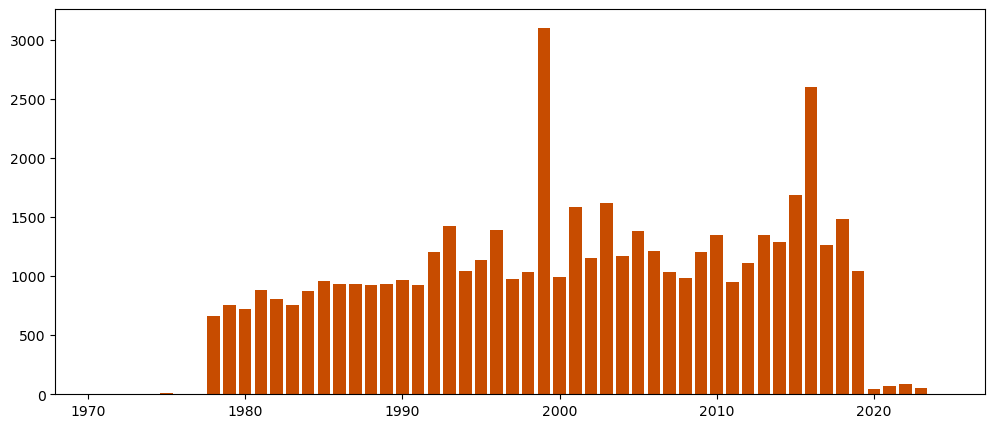

In [241]:
fig, ax = plt.subplots(1 ,1, figsize=(12,5))
ax.bar(counts_red_kangaroo_NT_SA_year["year"], counts_red_kangaroo_NT_SA_year["Red Kangaroo"], color = "#C74C00") # alpha = 0.5
plt.savefig("red_kangaroo", dpi=300)

In [242]:
counts_NT_SA_year["NT SA proportion of total counts all"] = counts_NT_SA_year["Red Kangaroo"] / counts_NT_SA_year["All Species"]
counts_NT_SA_year["NT SA proportion of total counts mammals"] = counts_NT_SA_year["Red Kangaroo"] / counts_NT_SA_year["Mammals"]
counts_NT_SA_year.head()

,year,All Species,Mammals,Red Kangaroo,NT SA proportion of total counts all,NT SA proportion of total counts mammals
0,1970,18785,246,0.0,0.000000,0.000000
1,1971,34180,204,2.0,0.000059,0.009804
2,1972,16727,325,1.0,0.000060,0.003077
3,1973,12850,150,1.0,0.000078,0.006667
4,1974,18573,117,0.0,0.000000,0.000000


Put proportions on same graph

Text(0.99, 0.5, 'Proportion of Records')

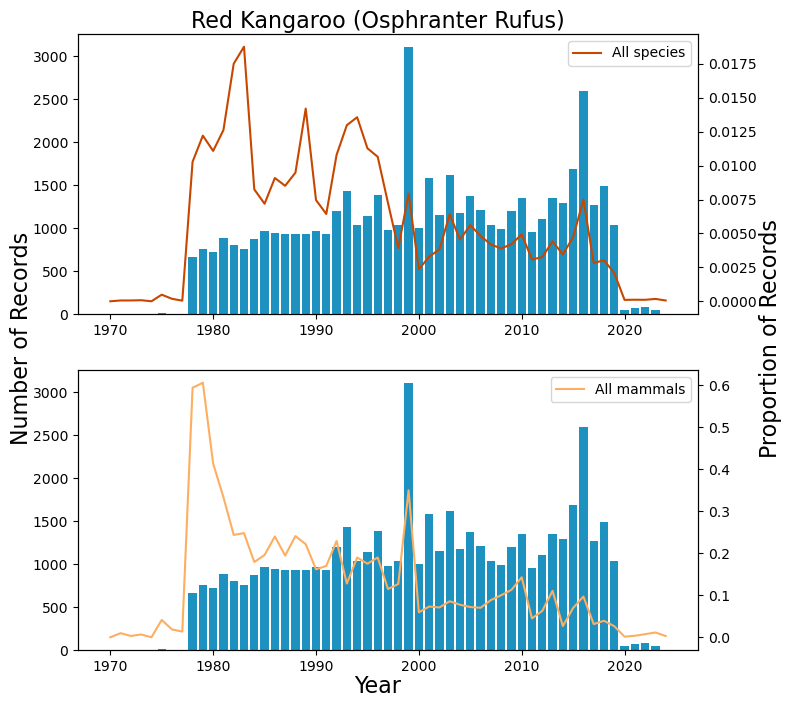

In [243]:
fig, ax = plt.subplots(2,1,figsize=(8,8))
ax2 = ax[0].twinx()
ax[0].bar(counts_NT_SA_year["year"], counts_NT_SA_year["Red Kangaroo"], color = "#1d91c0")
ax2.plot(counts_NT_SA_year["year"], counts_NT_SA_year["NT SA proportion of total counts all"], color="#C74700", label="All species")
ax2.legend()

# second graph
ax3 = ax[1].twinx()
ax[1].bar(counts_NT_SA_year["year"], counts_NT_SA_year["Red Kangaroo"], color = "#1d91c0")
ax3.plot(counts_NT_SA_year["year"], counts_NT_SA_year["NT SA proportion of total counts mammals"], color="#fdae61", label="All mammals")
ax3.legend()

# add title
fig.suptitle("Red Kangaroo (Osphranter Rufus)",size=16,y=0.91)
fig.supxlabel("Year",size=16,y=0.05)
fig.supylabel("Number of Records",size=16,x=0.04)
fig.text(x=0.99, y=0.5, s="Proportion of Records", size=16, rotation=90, ha='center', va='center')

In [244]:
data_names = galah.atlas_counts(taxa="Osphranter Rufus", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970"], group_by="dataProviderName", expand=False)

In [245]:
data_names["dataProviderName"][0]

'South Australia, Department for Environment and Water'

In [246]:
data_names["dataProviderName"][1]

'Department of Planning, Industry and Environment representing the State of New South Wales'

In [247]:
data_names["dataProviderName"][2]

'Northern Territory Department of Environment and Natural Resources'

In [248]:
# South Australia
SA = galah.atlas_counts(taxa="Osphranter Rufus",
                   use_data_profile=True,
                   filters=[
                       "basisOfRecord=HUMAN_OBSERVATION",
                       "year>=1970",
                       "dataProviderName=South Australia, Department for Environment and Water"
                   ],
                   group_by=["dataProviderName","year"],expand=True)

# New South Wales
NSW = galah.atlas_counts(taxa="Osphranter Rufus",
                   use_data_profile=True,
                   filters=[
                       "basisOfRecord=HUMAN_OBSERVATION",
                       "year>=1970",
                       "dataProviderName=Department of Planning, Industry and Environment representing the State of New South Wales"
                   ],
                   group_by=["dataProviderName","year"],expand=True)

# Northern Territory
NT = galah.atlas_counts(taxa="Osphranter Rufus",
                   use_data_profile=True,
                   filters=[
                       "basisOfRecord=HUMAN_OBSERVATION",
                       "year>=1970",
                       "dataProviderName=Northern Territory Department of Environment and Natural Resources"
                   ],
                   group_by=["dataProviderName","year"],expand=True)

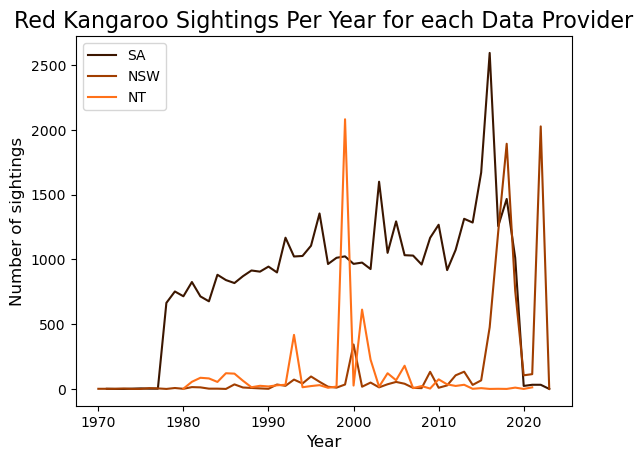

In [249]:
plt.plot(SA["year"], SA["count"], color="#3B1600", label="SA")
plt.plot(NSW["year"], NSW["count"], color="#A13E00", label="NSW")
plt.plot(NT["year"], NT["count"], color="#FF7119", label="NT")
plt.title("Red Kangaroo Sightings Per Year for each Data Provider", size=16)
plt.xlabel("Year", size=12)
plt.ylabel("Number of sightings", size=12)
plt.legend()
plt.savefig("red_kangaroo_sightings_per_data_provider.png", dpi=300)

In [250]:
SA_all = galah.atlas_counts(use_data_profile=True,
                   filters=[
                       "basisOfRecord=HUMAN_OBSERVATION",
                       "year>=1970",
                       "dataProviderName=South Australia, Department for Environment and Water"
                   ],
                   group_by=["dataProviderName","year"],expand=True)

NSW_all = galah.atlas_counts(use_data_profile=True,
                   filters=[
                       "basisOfRecord=HUMAN_OBSERVATION",
                       "year>=1970",
                       "dataProviderName=Department of Planning, Industry and Environment representing the State of New South Wales"
                   ],
                   group_by=["dataProviderName","year"],expand=True)

NT_all = galah.atlas_counts(use_data_profile=True,
                   filters=[
                       "basisOfRecord=HUMAN_OBSERVATION",
                       "year>=1970",
                       "dataProviderName=Northern Territory Department of Environment and Natural Resources"
                   ],
                   group_by=["dataProviderName","year"],expand=True)

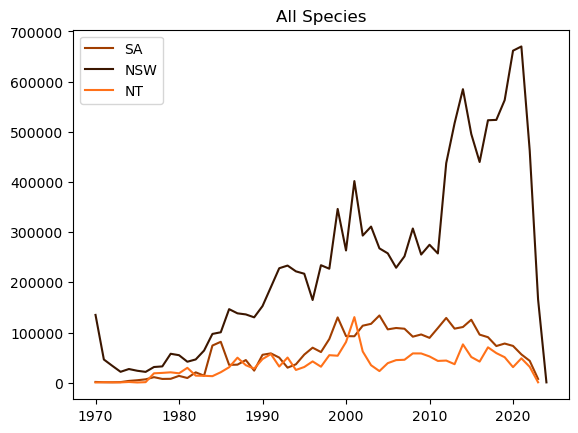

In [251]:
plt.plot(SA_all["year"], SA_all["count"], color="#A13E00", label="SA")
plt.plot(NSW_all["year"], NSW_all["count"], color="#3B1600", label="NSW")
plt.plot(NT_all["year"], NT_all["count"], color="#FF7119", label="NT")
plt.title("All Species")
plt.legend()

In [252]:
SA_mammalia = galah.atlas_counts(
    taxa="Mammalia",
    use_data_profile=True,
    filters=[
        "basisOfRecord=HUMAN_OBSERVATION",
        "year>=1970",
        "dataProviderName=South Australia, Department for Environment and Water"
    ],
    group_by=["dataProviderName","year"],expand=True)

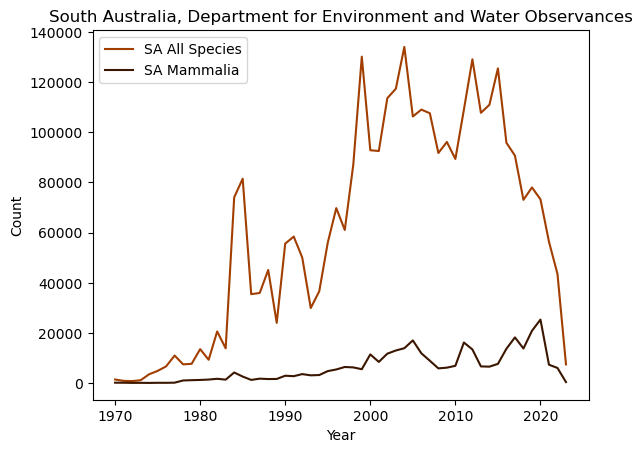

In [253]:
plt.plot(SA_all["year"],SA_all["count"],color="#A13E00",label="SA All Species")
plt.plot(SA_mammalia["year"],SA_mammalia["count"],color="#3B1600",label="SA Mammalia")
plt.title("South Australia, Department for Environment and Water Observances")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()

In [254]:
red_roo_SA = galah.atlas_counts(taxa="Osphranter Rufus",
                   use_data_profile=True,
                   filters=[
                       "basisOfRecord=HUMAN_OBSERVATION",
                       "year>=1970",
                       "dataProviderName=South Australia, Department for Environment and Water"
                   ],
                   group_by=["year"],expand=False).rename(columns={"count": "Red Kangaroo"})

In [255]:
all_species_SA = galah.atlas_counts(use_data_profile=True,
                   filters=[
                       "basisOfRecord=HUMAN_OBSERVATION",
                       "year>=1970",
                       "dataProviderName=South Australia, Department for Environment and Water"
                   ],
                   group_by=["year"],expand=False).rename(columns={"count": "All Species"})

In [256]:
all_mammals_SA = galah.atlas_counts(taxa="Mammalia",
                   use_data_profile=True,
                   filters=[
                       "basisOfRecord=HUMAN_OBSERVATION",
                       "year>=1970",
                       "dataProviderName=South Australia, Department for Environment and Water"
                   ],
                   group_by=["year"],expand=False).rename(columns={"count": "Mammals"})

In [257]:
counts_SA_year = all_species_SA.merge(all_mammals_SA, on="year", how="left").merge(red_roo_SA, on="year", how="left").fillna(0)
counts_SA_year.head()

,year,All Species,Mammals,Red Kangaroo
0,1970,1470,198,0.0
1,1971,921,180,2.0
2,1972,840,121,1.0
3,1973,1170,134,1.0
4,1974,3545,103,0.0


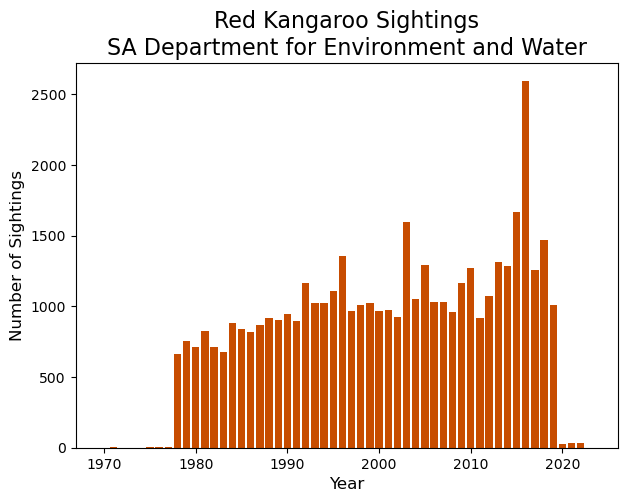

In [258]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.bar(counts_SA_year["year"], counts_SA_year["Red Kangaroo"],color = "#C74C00") # alpha = 0.5
plt.title("Red Kangaroo Sightings\nSA Department for Environment and Water",fontsize=16)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Number of Sightings",fontsize=12)
plt.savefig("red_kangaroo_sightings_SA.png",dpi=300)

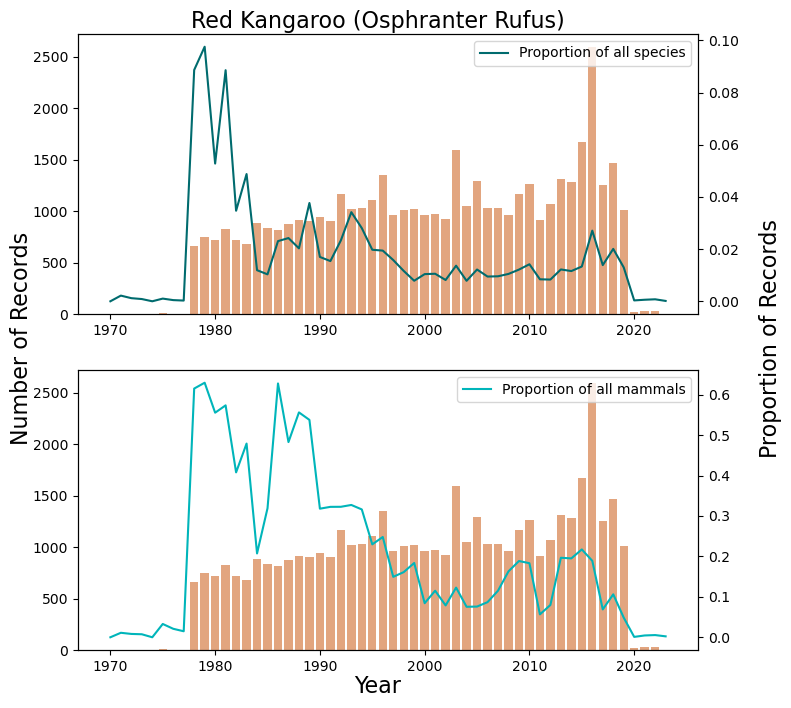

In [259]:
counts_SA_year["SA proportion of total counts all"] = counts_SA_year["Red Kangaroo"] / counts_SA_year["All Species"]
counts_SA_year["SA proportion of total counts mammals"] = counts_SA_year["Red Kangaroo"] / counts_SA_year["Mammals"]
counts_SA_year.head()

fig, ax = plt.subplots(2, 1, figsize=(8,8))
ax2 = ax[0].twinx()
ax[0].bar(counts_SA_year["year"], counts_SA_year["Red Kangaroo"], color = "#C74C00", alpha=0.5)
ax2.plot(counts_SA_year["year"], counts_SA_year["SA proportion of total counts all"], color="#006B6E", label="Proportion of all species")
ax2.legend()

# second graph
ax3 = ax[1].twinx()
ax[1].bar(counts_SA_year["year"], counts_SA_year["Red Kangaroo"], color = "#C74C00", alpha=0.5)
ax3.plot(counts_SA_year["year"], counts_SA_year["SA proportion of total counts mammals"], color="#00B5BA", label="Proportion of all mammals")
ax3.legend()

# add title
fig.suptitle("Red Kangaroo (Osphranter Rufus)",size=16,y=0.91)
fig.supxlabel("Year",size=16,y=0.05)
fig.supylabel("Number of Records",size=16,x=0.04)
fig.text(x=0.99, y=0.5, s="Proportion of Records", size=16, rotation=90, ha='center', va='center')
plt.savefig("Red_Kangaroo_Proportions_SA_vertical.png",dpi=300)

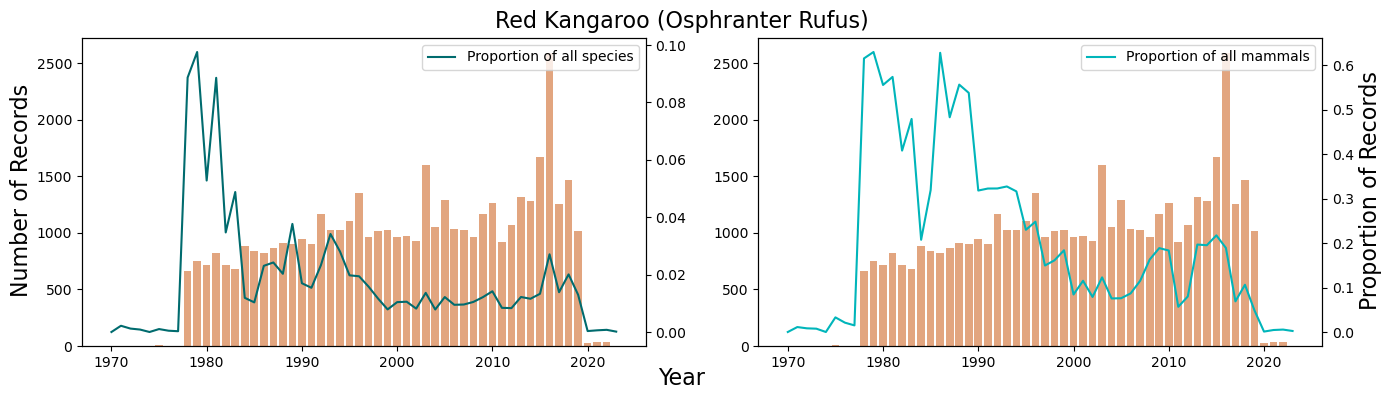

In [260]:
fig, ax = plt.subplots(1,2,figsize=(16,4))
ax2 = ax[0].twinx()
ax[0].bar(counts_SA_year["year"], counts_SA_year["Red Kangaroo"], color = "#C74C00", alpha=0.5)
ax2.plot(counts_SA_year["year"], counts_SA_year["SA proportion of total counts all"], color="#006B6E", label="Proportion of all species")
ax2.legend()

# second graph
ax3 = ax[1].twinx()
ax[1].bar(counts_SA_year["year"], counts_SA_year["Red Kangaroo"], color = "#C74C00", alpha=0.5)
ax3.plot(counts_SA_year["year"], counts_SA_year["SA proportion of total counts mammals"], color="#00B5BA", label="Proportion of all mammals")
ax3.legend()

# add title
fig.suptitle("Red Kangaroo (Osphranter Rufus)",size=16,y=0.95)
fig.supxlabel("Year",size=16,y=0)
fig.supylabel("Number of Records",size=16,x=0.08)
fig.text(x=0.93, y=0.5, s="Proportion of Records", size=16, rotation=90, ha='center', va='center')
plt.savefig("Red_Kangaroo_Proportions_SA_horizontal.png",dpi=300)

In [261]:
red_roo_SA_occurrences = galah.atlas_occurrences(taxa="Osphranter Rufus",
                   use_data_profile=True,
                   filters=[
                       "basisOfRecord=HUMAN_OBSERVATION",
                       "year>=1970",
                       "dataProviderName=South Australia, Department for Environment and Water"
                   ])

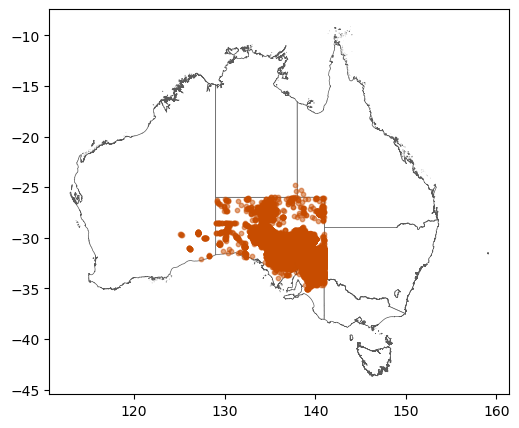

In [262]:
states_territories_main.plot(edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
plt.scatter(red_roo_SA_occurrences["decimalLongitude"],red_roo_SA_occurrences["decimalLatitude"],c = "#C74C00", alpha = 0.5, s=10)
plt.savefig("red_kangaroo_SA_map.png",dpi=300)

In [263]:
states_territories

,STE_CODE21,STE_NAME21,CHG_FLAG21,CHG_LBL21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry
0,1,New South Wales,0,No change,AUS,Australia,8.007977e+05,http://linked.data.gov.au/dataset/asgsed3/STE/1,"MULTIPOLYGON (((159.06230 -31.50886, 159.06218..."
1,2,Victoria,0,No change,AUS,Australia,2.274962e+05,http://linked.data.gov.au/dataset/asgsed3/STE/2,"MULTIPOLYGON (((146.29286 -39.15778, 146.29341..."
2,3,Queensland,0,No change,AUS,Australia,1.730171e+06,http://linked.data.gov.au/dataset/asgsed3/STE/3,"MULTIPOLYGON (((142.53140 -10.68301, 142.53072..."
3,4,South Australia,0,No change,AUS,Australia,9.842314e+05,http://linked.data.gov.au/dataset/asgsed3/STE/4,"MULTIPOLYGON (((140.66025 -38.06256, 140.66006..."
4,5,Western Australia,0,No change,AUS,Australia,2.526632e+06,http://linked.data.gov.au/dataset/asgsed3/STE/5,"MULTIPOLYGON (((117.86953 -35.19108, 117.86961..."
5,6,Tasmania,0,No change,AUS,Australia,6.801754e+04,http://linked.data.gov.au/dataset/asgsed3/STE/6,"MULTIPOLYGON (((144.60439 -41.01001, 144.60443..."
6,7,Northern Territory,0,No change,AUS,Australia,1.348134e+06,http://linked.data.gov.au/dataset/asgsed3/STE/7,"MULTIPOLYGON (((133.02818 -10.90839, 133.02982..."
7,8,Australian Capital Territory,0,No change,AUS,Australia,2.358133e+03,http://linked.data.gov.au/dataset/asgsed3/STE/8,"POLYGON ((149.06239 -35.15910, 149.09134 -35.1..."
8,9,Other Territories,0,No change,AUS,Australia,2.557420e+02,http://linked.data.gov.au/dataset/asgsed3/STE/9,"MULTIPOLYGON (((167.94747 -29.12757, 167.94748..."
9,Z,Outside Australia,1,New,ZZZ,Outside Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/STE/Z,None


In [264]:
# TRYING TO DO SOMETHING WITH THE DINGO FENCE

In [265]:
states_territories = gpd.read_file("Shapefiles/STE_2021_AUST_GDA2020/STE_2021_AUST_GDA2020.shp")
states_territories_main = states_territories[states_territories["STE_NAME21"] != "Other Territories"]
states_territories_main = states_territories_main.to_crs(4326)

SA = states_territories[states_territories["STE_NAME21"] == "South Australia"]

dog_fence = gpd.read_file("Shapefiles/SA Dingo Fence/Dog_Fence.shp").to_crs(4326)

In [266]:
dog_fence

,FEATURECOD,NAME,geometry
0,3013,Dog Fence,"LINESTRING (131.85612 -31.78878, 131.85861 -31..."


<Axes: >

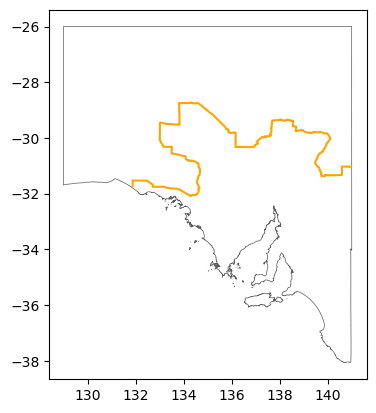

In [267]:
fig , ax = plt.subplots(1,1)
SA.plot(ax = ax, edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
dog_fence.plot(ax = ax, edgecolor = "orange")

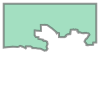

In [268]:
SA_shapely = shapely.ops.unary_union(SA.geometry)
dog_fence_shapely = shapely.ops.unary_union(dog_fence.geometry)
SA_split_shapely = split(SA_shapely, dog_fence_shapely)
# Note that [90] is the part of SA north of the dog fence
SA_split_shapely.geoms[90]

In [273]:
red_kangaroo_SA_N = galah.atlas_counts(taxa="Osphranter Rufus", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=South Australia"], group_by = ["year"], polygon = SA_split_shapely.geoms[90], expand=False).rename(columns={"count": "Red Kangaroo N"})
red_kangaroo_SA_all = galah.atlas_counts(taxa="Osphranter Rufus", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=South Australia"], group_by = ["year"], expand=False).rename(columns={"count": "Red Kangaroo"})
all_species_SA_N = galah.atlas_counts(use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=South Australia"], group_by = ["year"], polygon = SA_split_shapely.geoms[90], expand=False).rename(columns={"count": "All Species N"})
all_species_SA_all = galah.atlas_counts(use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=South Australia"], group_by = ["year"], expand=False).rename(columns={"count": "All Species"})
mammals_SA_N = galah.atlas_counts(taxa="Mammalia", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=South Australia"], group_by = ["year"], polygon = SA_split_shapely.geoms[90], expand=False).rename(columns={"count": "Mammals N"})
mammals_SA_all = galah.atlas_counts(taxa="Mammalia", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=South Australia"], group_by = ["year"], expand=False).rename(columns={"count": "Mammals"})

In [270]:
counts_SA_year_all = all_species_SA_all.merge(mammals_SA_all, on="year", how="left").merge(red_kangaroo_SA_all, on="year", how="left").fillna(0)
counts_SA_year_N = all_species_SA_N.merge(mammals_SA_N, on="year", how="left").merge(red_kangaroo_SA_N, on="year", how="left").fillna(0)
counts_SA_year_NS = counts_SA_year_all.merge(counts_SA_year_N, on="year", how="left").fillna(0)
counts_SA_year_NS["All Species S"] = counts_SA_year_NS["All Species"] - counts_SA_year_NS["All Species N"]
counts_SA_year_NS["Mammals S"] = counts_SA_year_NS["Mammals"] - counts_SA_year_NS["Mammals N"]
counts_SA_year_NS["Red Kangaroo S"] = counts_SA_year_NS["Red Kangaroo"] - counts_SA_year_NS["Red Kangaroo N"]

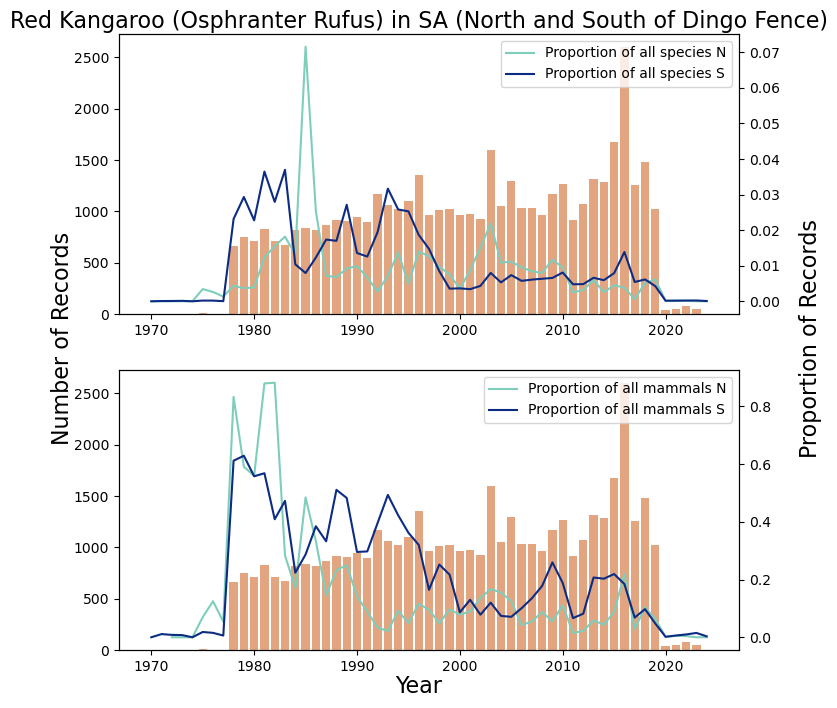

In [324]:
counts_SA_year_NS["SA proportion of total counts all N"] = counts_SA_year_NS["Red Kangaroo N"] / counts_SA_year_NS["All Species N"]
counts_SA_year_NS["SA proportion of total counts all S"] = counts_SA_year_NS["Red Kangaroo S"] / counts_SA_year_NS["All Species S"]
counts_SA_year_NS["SA proportion of total counts mammals N"] = counts_SA_year_NS["Red Kangaroo N"] / counts_SA_year_NS["Mammals N"]
counts_SA_year_NS["SA proportion of total counts mammals S"] = counts_SA_year_NS["Red Kangaroo S"] / counts_SA_year_NS["Mammals S"]

fig, ax = plt.subplots(2, 1, figsize=(8,8))
ax2 = ax[0].twinx()
ax[0].bar(counts_SA_year_NS["year"], counts_SA_year_NS["Red Kangaroo"], color = "#C74C00", alpha=0.5)
ax2.plot(counts_SA_year_NS["year"], counts_SA_year_NS["SA proportion of total counts all N"], color="#7fcdbb", label="Proportion of all species N")
ax2.plot(counts_SA_year_NS["year"], counts_SA_year_NS["SA proportion of total counts all S"], color="#0c2c84", label="Proportion of all species S")
ax2.legend()

# second graph
ax3 = ax[1].twinx()
ax[1].bar(counts_SA_year_NS["year"], counts_SA_year_NS["Red Kangaroo"], color = "#C74C00", alpha=0.5)
ax3.plot(counts_SA_year_NS["year"], counts_SA_year_NS["SA proportion of total counts mammals N"], color="#7fcdbb", label="Proportion of all mammals N")
ax3.plot(counts_SA_year_NS["year"], counts_SA_year_NS["SA proportion of total counts mammals S"], color="#0c2c84", label="Proportion of all mammals S")
ax3.legend()

# add title
fig.suptitle("Red Kangaroo (Osphranter Rufus) in SA (North and South of Dingo Fence)",size=16,y=0.91)
fig.supxlabel("Year",size=16,y=0.05)
fig.supylabel("Number of Records",size=16,x=0.04)
fig.text(x=0.99, y=0.5, s="Proportion of Records", size=16, rotation=90, ha='center', va='center')
plt.savefig("Red_Kangaroo_dingo_fence_proportions_SA_vertical.png",dpi=300)

In [ ]:
red_kangaroo_SA_occs = galah.atlas_occurrences(taxa="Osphranter Rufus", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=South Australia"])

In [198]:
geometry = [Point(xy) for xy in zip(red_kangaroos_SA_all.decimalLongitude, red_kangaroos_SA_all.decimalLatitude)]

NameError: name 'red_kangaroos_SA_all' is not defined

In [274]:
red_kangaroo_SA_occs = galah.atlas_occurrences(taxa="Osphranter Rufus", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=South Australia"])

In [277]:
geometry = [Point(xy) for xy in zip(red_kangaroo_SA_occs.decimalLongitude, red_kangaroo_SA_occs.decimalLatitude)]

In [296]:
red_kangaroo_SA_occs = gpd.GeoDataFrame(red_kangaroo_SA_occs, crs="EPSG:4326", geometry=geometry)
dingo_fence_N_gdf = gpd.GeoDataFrame(index=[0], crs='EPSG:4326', geometry=[SA_split_shapely.geoms[90]])

In [312]:
red_kangaroo_SA_occs_NS = gpd.sjoin(dingo_fence_N_gdf, red_kangaroo_SA_occs, how = "right")
red_kangaroo_SA_occs_NS["Side of Dingo Fence"] = ['S' if pd.isnull(a) else 'N' for a in red_kangaroo_SA_occs_NS['index_left']]
red_kangaroo_SA_occs_NS["color"] = ['#0c2c84' if pd.isnull(a) else '#7fcdbb' for a in red_kangaroo_SA_occs_NS['index_left']]

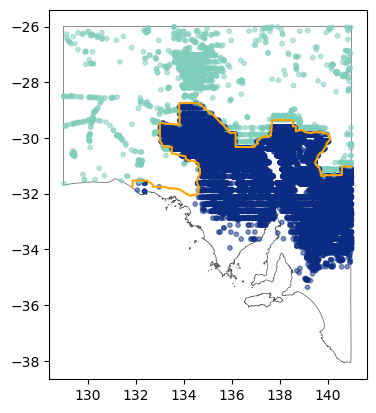

In [319]:
fig , ax = plt.subplots(1,1)
SA.plot(ax = ax, edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
plt.scatter(red_kangaroo_SA_occs_NS["decimalLongitude"], red_kangaroo_SA_occs_NS["decimalLatitude"], color = red_kangaroo_SA_occs_NS["color"], alpha = 0.5, s=10)
dog_fence.plot(ax = ax, edgecolor = "orange")
plt.savefig("Red_Kangaroo_Dingo_Fence_SA_map.png",dpi=300)

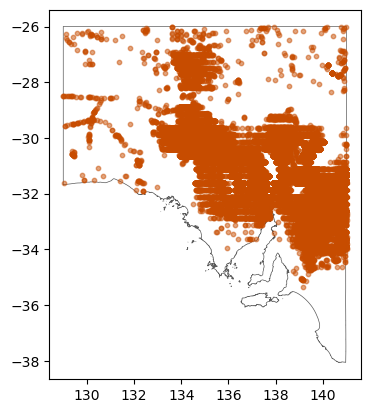

In [317]:
fig , ax = plt.subplots(1,1)
SA.plot(ax = ax, edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
plt.scatter(red_kangaroo_SA_occs_NS["decimalLongitude"], red_kangaroo_SA_occs_NS["decimalLatitude"], color = "#C74C00", alpha = 0.5, s=10)
plt.savefig("Red_Kangaroo_SA_map.png",dpi=300)

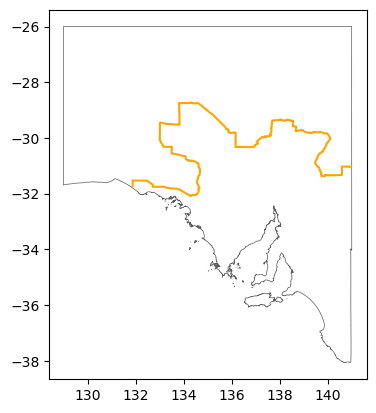

In [318]:
fig , ax = plt.subplots(1,1)
SA.plot(ax = ax, edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
dog_fence.plot(ax = ax, edgecolor = "orange")
plt.savefig("Dingo_Fence_SA_map.png",dpi=300)